In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from full_fred.fred import Fred

# FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred()
print(f"FRED APIキーが環境変数に設定されている：{fred.env_api_key_found()}")


def get_fred_data(name, start="2013-01-01", end=""):
    df = fred.get_series_df(name)[["date", "value"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")

    if end == "":
        df = df.loc[f"{start}":]
    else:
        df = df.loc[f"{start}":f"{end}"]

    return df

FRED APIキーが環境変数に設定されている：True


## ICE BofA US High Yield Index Option-Adjusted Spread
ソース：https://fred.stlouisfed.org/series/BAMLH0A0HYM2

In [2]:
df_BAMLH0A0HYM2 = get_fred_data("BAMLH0A0HYM2", start="2017-01-01")
df_BAMLH0A0HYM2.head(5)

,value
date,
2017-01-02,NaN
2017-01-03,4.13
2017-01-04,4.02
2017-01-05,4.04
2017-01-06,3.98


##  S&P 500
ソース：https://fred.stlouisfed.org/series/SP500

In [3]:
df_SP500 = get_fred_data("SP500", start="2017-01-01")
df_SP500.head(5)

,value
date,
2017-01-02,NaN
2017-01-03,2257.83
2017-01-04,2270.75
2017-01-05,2269.00
2017-01-06,2276.98


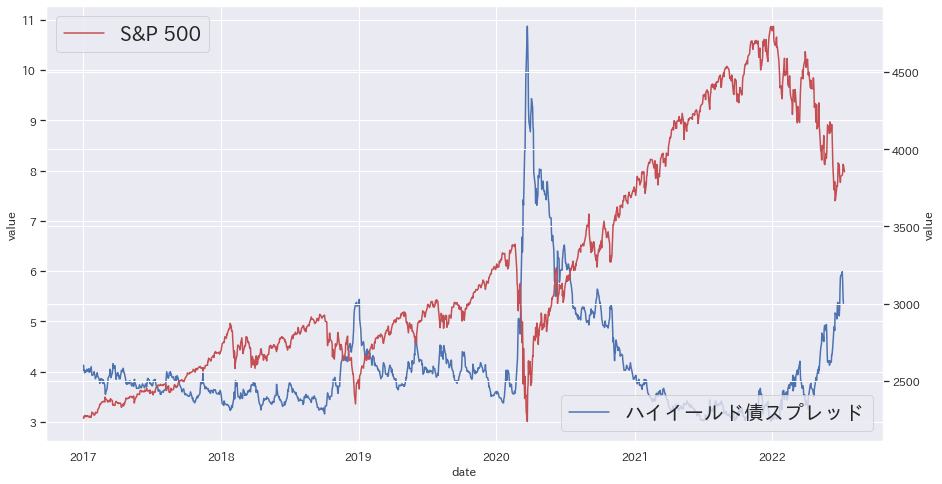

In [4]:
sns.set(rc={"figure.figsize": (15, 8)})
japanize_matplotlib.japanize()

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.lineplot(data=df_BAMLH0A0HYM2, x="date", y="value", label="ハイイールド債スプレッド", color="b")
plt.legend(loc="lower right", fontsize="20")

ax2 = ax1.twinx()
sns.lineplot(data=df_SP500, x="date", y="value", label="S&P 500", color="r")
plt.legend(loc="upper left", fontsize="20")

## ピークを検出する
### ハイイールド債スプレッドのピーク
[scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)を用いて、ピークとなっている時点を検出してみます。

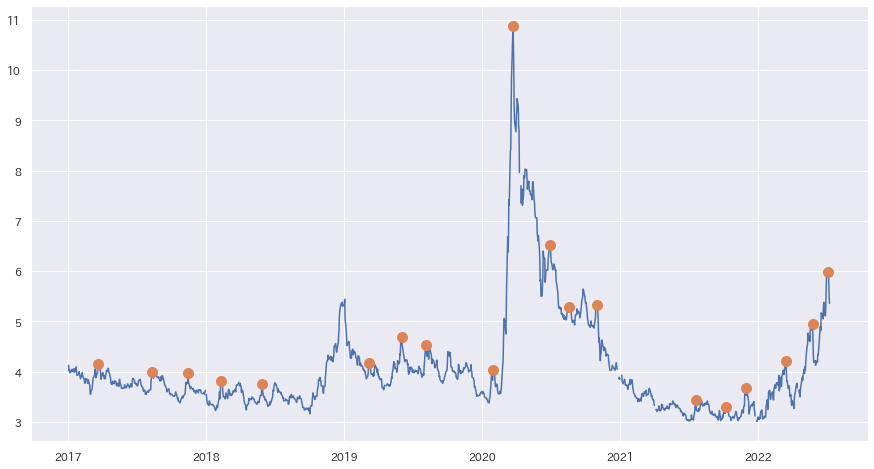

In [5]:
import numpy as np
from scipy.signal import find_peaks

data = df_BAMLH0A0HYM2["value"]
peaks, _ = find_peaks(data, distance=30, threshold=0.03, width=3)
plt.plot(data)
plt.plot(data.iloc[peaks].index, data.iloc[peaks], "o", markersize=10)
plt.show()

## SP500とハイイールド債券のピークを比較してみる
先ほど検出したピークの点に一致する日付には黒い線を入れています。

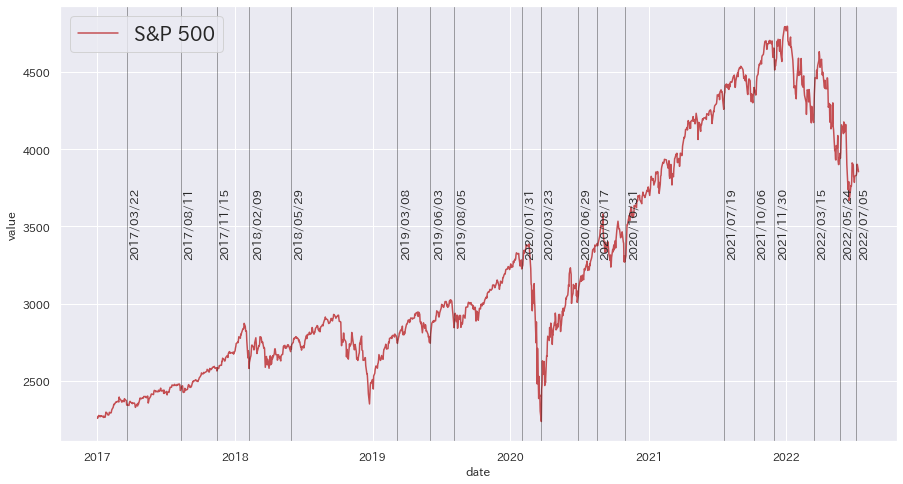

In [6]:
sns.set(rc={"figure.figsize": (15, 8)})
japanize_matplotlib.japanize()
sns.lineplot(data=df_SP500, x="date", y="value", label="S&P 500", color="r")
for peak_date in data.iloc[peaks].index:
    plt.axvline(peak_date, alpha=0.5, linewidth=0.75, color="k")
    plt.text(
        peak_date + pd.DateOffset(5),
        3300,
        f'{peak_date.strftime("%Y/%m/%d")}',
        rotation=90,
    )
plt.legend(loc="upper left", fontsize="20")